# Spatial Analysis

In [1]:
from descartes import PolygonPatch
import geopandas as gp
#import pysal as ps
import numpy as np
import pandas as pd

# Import libraries for visualization
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import json
from descartes import PolygonPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl

In [2]:
# Open the geojson of NUTS 2 regions to get the coordinates of the regions
with open("/Users/maxbehrens/Documents/Msc/Thesis/Data/geo_data_2016/NUTS_RG_01M_2016_4326_LEVL_2.geojson") as f:
    nuts2_poly_2016 = json.load(f)

In [3]:
# Get the cleaned GDP data to match with regions and download correct data
gdp_data = pd.read_csv('/Users/maxbehrens/Documents/Msc/Thesis/Data/gdp_data/nuts_gdp_cleaned.csv')
gdp_data.head()

,region,year,value,code,country
0,BE,2008,33100.0,BE,Belgium
1,BE1,2008,61100.0,BE,Belgium
2,BE10,2008,61100.0,BE,Belgium
3,BE2,2008,33100.0,BE,Belgium
4,BE21,2008,39200.0,BE,Belgium


In [4]:
# Countries which are banned from the analysis
banned_mean_countries = ['FI','SE','NO','BE']
banned_country_countries = ['FI','SE','NO','BE','CY','EE','LU','LV','ME','MK','MT','HR','LT','SI']

In [5]:
poly_used = []
poly_banned = []
poly_not = []
years = [2014,2015,2016,2017]

for year in years:
    for i in range(len(nuts2_poly_2016['features'])):
        if nuts2_poly_2016['features'][i]['properties']['NUTS_ID'][:2] in banned_mean_countries:
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            p = Polygon(tuple(zip(x,y)))
            poly_banned.append(p)

        elif np.any(gdp_data.loc[gdp_data['year']==year,'region'].isin([nuts2_poly_2016['features'][i]['properties']['NUTS_ID']])):
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            p = Polygon(tuple(zip(x,y)))
            poly_used.append(p)

        else:
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            p = Polygon(tuple(zip(x,y)))
            poly_not.append(p)

    fig, ax = plt.subplots()

    p = PatchCollection(poly_used, color='gray',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    p = PatchCollection(poly_banned, color='red',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    p = PatchCollection(poly_not, color='white',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    ax.autoscale_view()
    ax.set_xlim((-12,45))
    ax.set_ylim((30,75))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(str(year))
    plt.figure(figsize=(20,10), dpi=250)
    fig.tight_layout()
    fig.savefig(str('/Users/maxbehrens/Documents/Msc/Thesis/Data/plots/nuts'+str(year)+'_mapping.png'), dpi=250)
    #plt.show()

<Figure size 5000x2500 with 0 Axes>

<Figure size 5000x2500 with 0 Axes>

<Figure size 5000x2500 with 0 Axes>

<Figure size 5000x2500 with 0 Axes>

In [7]:
poly_used = []
poly_banned = []
poly_not = []
years = [2014,2015,2016,2017]
for year in years:
    for i in range(len(nuts2_poly_2016['features'])):
        if nuts2_poly_2016['features'][i]['properties']['NUTS_ID'][:2] in banned_country_countries:
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            p = Polygon(tuple(zip(x,y)))
            poly_banned.append(p)

        elif np.any(gdp_data.loc[gdp_data['year']==year,'region'].isin([nuts2_poly_2016['features'][i]['properties']['NUTS_ID']])):
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            p = Polygon(tuple(zip(x,y)))
            poly_used.append(p)

        else:
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            p = Polygon(tuple(zip(x,y)))
            poly_not.append(p)

    fig, ax = plt.subplots()

    p = PatchCollection(poly_used, color='gray',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    p = PatchCollection(poly_banned, color='red',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    p = PatchCollection(poly_not, color='white',lw=0.5,edgecolor='k')
    ax.add_collection(p)

    ax.autoscale_view()
    ax.set_xlim((-12,45))
    ax.set_ylim((30,75))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(str(year))
    plt.figure(figsize=(20,10), dpi=250)
    fig.tight_layout()
    fig.savefig(str('/Users/maxbehrens/Documents/Msc/Thesis/Data/plots/nuts'+str(year)+'_country_mapping.png'), dpi=250)
    #plt.show()

<Figure size 5000x2500 with 0 Axes>

<Figure size 5000x2500 with 0 Axes>

<Figure size 5000x2500 with 0 Axes>

<Figure size 5000x2500 with 0 Axes>

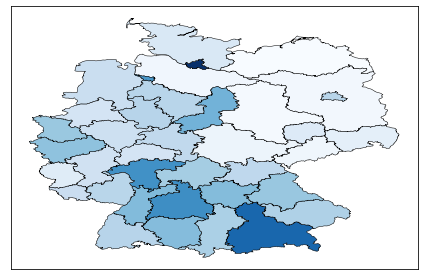

<Figure size 400x200 with 0 Axes>

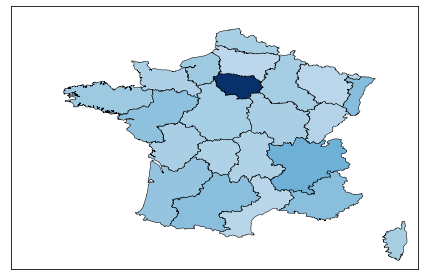

<Figure size 400x200 with 0 Axes>

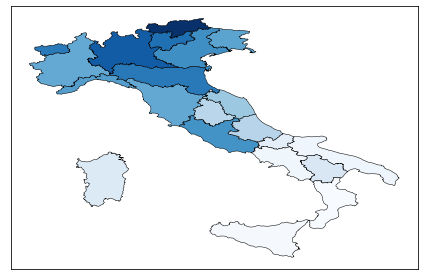

<Figure size 400x200 with 0 Axes>

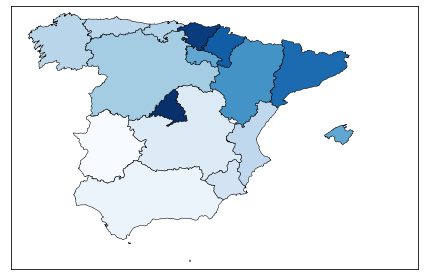

<Figure size 400x200 with 0 Axes>

In [5]:
year = 2017
countries = ['DE','FR','IT','ES']
for country in countries:
    poly_color = []
    poly_banned = []
    for i in range(len(nuts2_poly_2016['features'])):
        if nuts2_poly_2016['features'][i]['properties']['NUTS_ID'][:2] in country:
            if nuts2_poly_2016['features'][i]['geometry']['type'] == 'MultiPolygon':
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0][0]
            else:    
                t = nuts2_poly_2016['features'][i]['geometry']['coordinates'][0]

            x = [coord[0] for coord in t]
            y = [coord[1] for coord in t]

            region = nuts2_poly_2016['features'][i]['properties']['NUTS_ID']
            p = Polygon(tuple(zip(x,y)))
            poly_banned.append(p)
            poly_color.append(gdp_data.loc[(gdp_data['region']==region)&(gdp_data['year']==year),'value'].values[0])

        else:
            pass

    fig, ax = plt.subplots()

    norm = mpl.colors.Normalize(vmin=min(poly_color), vmax=max(poly_color))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
    #cmap.set_array([])

    colours = []
    for col in poly_color:
        colours.append(cmap.to_rgba(col))
    
    p = PatchCollection(poly_banned, color=colours,lw=0.5,edgecolor='k')
    ax.add_collection(p)

    ax.autoscale_view()
    if country == 'FR':
        ax.set_xlim((-7,10))
        ax.set_ylim((41,52))
    elif country == 'ES':
        ax.set_xlim((-10,6))
        ax.set_ylim((35,44))
    else:
        pass
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.set_title(str(year))
    plt.figure(figsize=(20,10), dpi=20)
    fig.tight_layout()
    #fig.savefig(str('/Users/maxbehrens/Downloads/nuts'+str(country)+'_country_mapping.png'), dpi=250)
    #plt.show()